In [1]:
import pandas as pd
import matplotlib.pyplot as plt


tags = pd.read_csv("tags-20210226.csv")
works = pd.read_csv("works-20210226.csv")


In [2]:
tags.head()

,id,type,name,canonical,cached_count,merger_id
0,1,Media,TV Shows,True,910,NaN
1,2,Media,Movies,True,1164,NaN
2,3,Media,Books & Literature,True,134,NaN
3,4,Media,Cartoons & Comics & Graphic Novels,True,166,NaN
4,5,Media,Anime & Manga,True,501,NaN


In [3]:
works.head()

,creation date,language,restricted,complete,word_count,tags,Unnamed: 6
0,2021-02-26,en,False,True,388.0,10+414093+1001939+4577144+1499536+110+4682892+...,NaN
1,2021-02-26,en,False,True,1638.0,10+20350917+34816907+23666027+23269305+2326930...,NaN
2,2021-02-26,en,False,True,1502.0,10+10613413+9780526+3763877+3741104+7657229+30...,NaN
3,2021-02-26,en,False,True,100.0,10+15322+54862755+20595867+32994286+663+471751...,NaN
4,2021-02-26,en,False,True,994.0,11+721553+54604+1439500+3938423+53483274+54862...,NaN


Need function to look up works associated with a tag.
Need to see what types of tags there are.
Need to see what are most popular tags of each type.
Need to see how a particular tag changes in popularity over time.
Need to see time span of works in data set.
Need to see works with largest world count.
On average do works with different tags vary in length?


Ao3 wast established in 2008 and our dataset is from 2021. When was the earliest work written? The latest?

In [4]:
print("latest work: ", works["creation date"].max())
print("earliest work: ", works["creation date"].min())


latest work:  2021-02-26
earliest work:  2008-09-13


What's the average word count for these works? Max?

In [5]:
print("Average word count: ", works["word_count"].mean())
print("Max word count: ", works["word_count"].max())

Average word count:  7213.8505821525505
Max word count:  5078036.0


What tag types are there?

In [36]:
tags.groupby(["type"]).count()

,id,name,canonical,cached_count,merger_id
type,,,,,
ArchiveWarning,6,6,6,6,0
Category,15,15,15,15,0
Character,1509000,1509000,1509000,1509000,553710
Fandom,204858,204858,204858,204858,129278
Freeform,9244331,9244331,9244331,9244331,1822087
Media,12,12,12,12,0
Rating,6,6,6,6,0
Relationship,2048295,2048293,2048295,2048295,961842
UnsortedTag,1460615,1460615,1460615,1460615,0


What are the top ten fandoms with the most works on Ao3?


In [7]:
tags.loc[tags["type"] == "Fandom"].sort_values(by = ["cached_count"], ascending = False)[:10]

,id,type,name,canonical,cached_count,merger_id
94292,136512,Fandom,Harry Potter - J. K. Rowling,True,361919,NaN
25,27,Fandom,Supernatural,True,310300,NaN
230408,414093,Fandom,Marvel Cinematic Universe,True,240536,NaN
1553725,3828398,Fandom,僕のヒーローアカデミア | Boku no Hero Academia | My Hero ...,True,204096,NaN
680695,1002903,Fandom,방탄소년단 | Bangtan Boys | BTS,True,203097,NaN
168289,258526,Fandom,Teen Wolf (TV),True,172802,NaN
679946,1001939,Fandom,The Avengers (Marvel Movies),True,157813,NaN
92059,133185,Fandom,Sherlock (TV),True,151925,NaN
5974,7266,Fandom,Marvel,True,147757,NaN
494603,758208,Fandom,Haikyuu!!,True,130918,NaN


Top ten relationship tags on ao3?

In [8]:
tags.loc[tags["type"] == "Relationship"].sort_values(by = ["cached_count"], ascending = False)[:10]

,id,type,name,canonical,cached_count,merger_id
173025,264659,Relationship,Derek Hale/Stiles Stilinski,True,122223,NaN
4700,5672,Relationship,Castiel/Dean Winchester,True,111991,NaN
8900,11006,Relationship,Sherlock Holmes/John Watson,True,87435,NaN
76021,110293,Relationship,"James ""Bucky"" Barnes/Steve Rogers",True,77276,NaN
85,99,Relationship,Draco Malfoy/Harry Potter,True,74244,NaN
5973,7265,Relationship,Steve Rogers/Tony Stark,True,64923,NaN
378701,607596,Relationship,Stucky,False,54045,110293.0
256699,450395,Relationship,Harry Styles/Louis Tomlinson,True,48225,NaN
1114701,1981115,Relationship,Jikook,False,43327,5560386.0
352836,575567,Relationship,Aziraphale/Crowley (Good Omens),True,39319,NaN


Functions to take a string of tag Ids and give us all the tags.

In [9]:
def decode_tag(tag_id):
    tag = tags.loc[tags["id"] == tag_id]["name"].tolist()[0]
    return tag
    
def decode_tag_str(tag_id_str):
    tag_ids = tag_id_str.split("+")
    tag_ids = [int(tag_id) for tag_id in tag_ids]
    ls=[]
    for tag_id in tag_ids:
        tag = decode_tag(tag_id)
        ls.append(tag)
    return ls



What are the tags on the longest Ao3 work?

In [10]:
longest_work_tags = works.loc[works["word_count"] == works["word_count"].max()]["tags"].tolist()[0]
print(decode_tag_str(longest_work_tags))

['F/M', 'The Hobbit - All Media Types', 'Thranduil', 'Modern Era', 'Ireland', 'Mature', 'The Lord of the Rings - All Media Types', 'The Silmarillion and other histories of Middle-Earth - J. R. R. Tolkien', 'Multi', 'Graphic Depictions Of Violence', 'M/M', 'Elves', 'Choose Not To Use Archive Warnings', 'Redacted', 'Redacted', 'Redacted', 'Redacted', "that's what she said", 'Redacted', 'Redacted', 'Redacted', 'Redacted', 'Redacted', 'Redacted', 'Redacted', 'Lorna Donovan', 'Ratiri Duncan', 'Sharley Corwin', 'Redacted', 'Redacted', 'Redacted']


What are all of these Redacted tags? I'm guessing they've decided to exclude some NSFW tags from the dataset.

In [11]:
tags.loc[tags["name"] == "Redacted"]

,id,type,name,canonical,cached_count,merger_id
27,31,Fandom,Redacted,False,5,25968.0
60,73,Character,Redacted,False,1,69.0
61,74,Character,Redacted,False,1,544.0
67,80,Freeform,Redacted,False,3,5120.0
68,82,Freeform,Redacted,False,2,23143.0
...,...,...,...,...,...,...
14467133,55395603,Freeform,Redacted,False,0,NaN
14467134,55395606,Freeform,Redacted,False,0,NaN
14467135,55395609,Freeform,Redacted,False,0,NaN
14467136,55395612,Freeform,Redacted,False,0,NaN


Let's create a function that gets all the works with a particular tag ID. First we need to prepend and append a "+" sign to our tag column so we can get our regular expression to find tags correctly.

In [12]:
works["tags"]="+" + works["tags"] + "+"


Now we write a function that uses a regular expression to find all works matching the tag ID.

In [13]:
def works_with_tag_id(tag_id):
    regex="\+"+ str(tag_id) + "\+"
    return works.loc[works["tags"].str.contains(regex, na=False)]

Below is all the works tagged with 136512, the tag that indicates the work belongs to the Harry Potter fandom.

In [14]:
works_with_tag_id(136512)

,creation date,language,restricted,complete,word_count,tags,Unnamed: 6
30,2021-02-26,en,False,True,37.0,+9+136512+17106+11235+572192+21+14+,NaN
45,2021-02-26,en,False,True,1608.0,+13+136512+10760+1048+1589+2174+2157+974+2211+...,NaN
107,2021-02-26,en,False,False,2900.0,+10+136512+1110+89592+93721+1754932+4429418+23...,NaN
147,2021-02-26,en,False,False,1404.0,+11+136512+33035890+26740493+24757434+11987966...,NaN
175,2021-02-26,en,False,True,3310.0,+9+136512+15993+396+2927+315707+21+16+,NaN
...,...,...,...,...,...,...,...
7268022,2008-11-18,en,True,True,9292.0,+23+183+3868+3869+3844+2175+16+3845+3846+182+3...,NaN
7268023,2008-11-18,en,True,True,3344.0,+23+183+3872+3844+2211+215+989+16+3808+1172+38...,NaN
7268036,2008-11-16,en,True,True,1381.0,+23+183+1803+2211+16+62+2099+3803+60+11+3814+2...,NaN
7268123,2008-11-12,en,True,True,7408.0,+23+183+3515+966+16+180+12+3805+3806+3807+3507...,NaN


Let's extract the year each work was written in from the creation date. Then we can use this information to track how many works are created over a year

In [15]:
works["creation date"] = pd.to_datetime(works["creation date"])
works["year"] = works["creation date"].dt.year

In [39]:
def graph_tag_over_time(tag_id):
    tagged_works = works_with_tag_id(tag_id)
    by_year = tagged_works.groupby(["year"]).count()
    years = by_year.index.tolist()
    count = by_year["creation date"].tolist()
    plt.plot(years,count)
    plt.xlabel("Year")
    plt.ylabel("Count of Works with Tag ID "+str(tag_id))
    plt.show()

Let's graph the Supernatural tag over time (tag 27)! This is a show that has been around throughout the time of the archive as it started in 2005 and its fandom reached peak popularity on Tumblr between 2013-2016. It had its show finale in 2020 (which explains the slight uptick in 2020!)

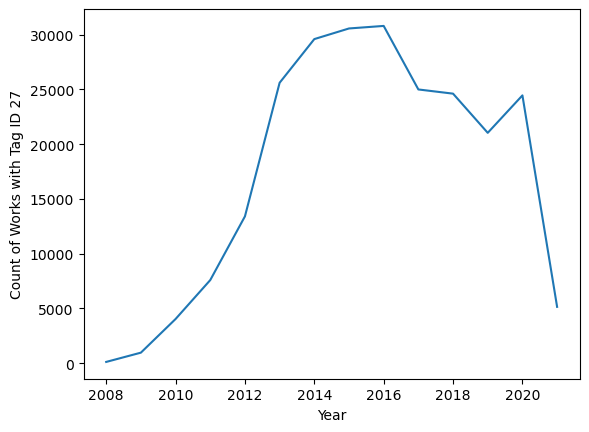

In [40]:
graph_tag_over_time(27)